# **Analysis of Fiscal Trends and Economic Shocks in India**

Fiscal measure play vital role in understanding the economic situation of country. Variables like expenditure by the government and total tax revenue are used to formulate the policy and stablise the fiscal deficit. Thorough analysis helps to better understand the trend of fiscal deficit and other economic measure over the years and specially during period of economic shocks.

**About the data**

Year- Calender year of the data

Country- Country name

Public Debt (Internal)- Domestic Government debt

Public Debt (External)- Foreign Borrowing

Tax revenue- Total Tax collected

Direct Tax- Portion from Income/corporate tax subset of Tax revenue

Total receipts- All government inflows including tax and non tax

Total Expenditure- Overall government spending

Gross Fiscal Deficit- Total expenditure minus Total receipts

In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t

In [347]:
raw_data = pd.read_csv('Public Finance.csv', dtype= {'Year': 'int32'})

In [348]:
# Drop Direct Tax
raw_data = raw_data.drop(columns= ['Direct tax'])

In [349]:
rows_to_drop = raw_data.loc[:,'Public Debt (Internal)':].isna().all(axis=1)
raw_data = raw_data[~rows_to_drop]

In [350]:
# Country names
country_names = raw_data['Country'].unique()

In [351]:
# Gross Fiscal deficit corrected
raw_data.loc[:,'Gross Fiscal Deficit'] = raw_data['Total expenditure'] - raw_data['Total receipts']

In [352]:
# Create Total debt column
raw_data.loc[:,'Total debt'] = (raw_data['Public Debt (Internal)'] +
                                raw_data['Public Debt (External)'])

In [353]:
# Create Debt to revenue column
raw_data.loc[:,'Debt to revenue'] = (raw_data['Total debt'] / 
                                     raw_data['Tax revenue']).round(2)

In [354]:
# Columns reordered
raw_data = raw_data[['Year', 'Country', 'Public Debt (Internal)', 'Public Debt (External)',
       'Tax revenue', 'Total receipts', 'Total expenditure', 'Total debt', 'Debt to revenue',
                    'Gross Fiscal Deficit']]
raw_data = raw_data.reset_index(drop=True)

In [355]:
# create copy of final dataset
df = raw_data.copy()

In [356]:
# df India
dfindia = df[df['Country'] == "India"].reset_index(drop=True)

## **Graphical representation of Fiscal Measures (India)**

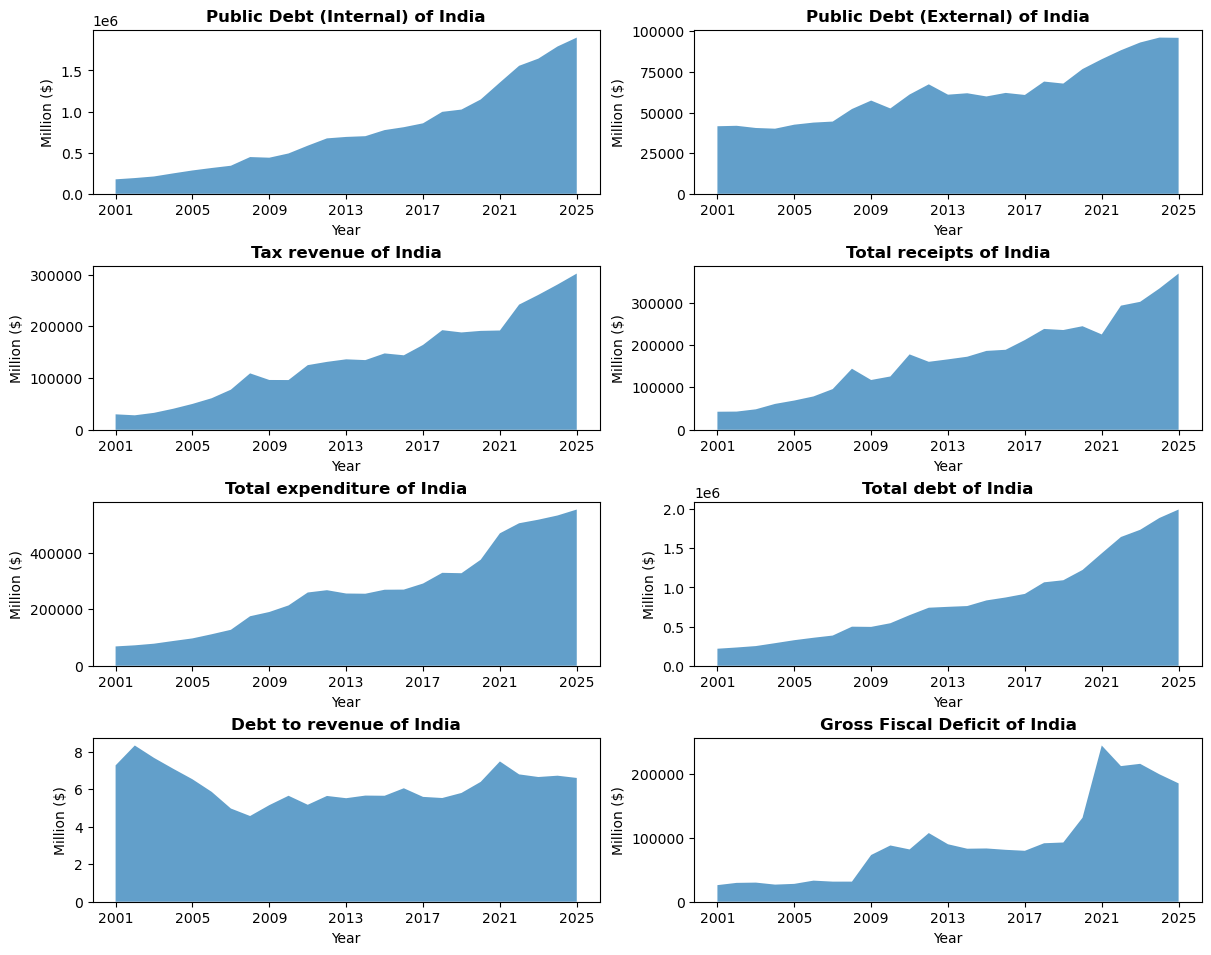

In [358]:
# Graphical representation of Fiscal measures

fisal_measures = dfindia.iloc[:,2:].columns

plt.figure(figsize=(12, 16), layout= 'constrained')
for i, fiscal_m in zip(range(1,9), fisal_measures):
    plt.subplot(8,2,i)
    plt.stackplot(dfindia['Year'], 
                  dfindia[fiscal_m],
                 alpha=0.7)
    plt.title(f'{fiscal_m} of India', fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Million ($)')
    plt.xticks(range(2001,2027,4))
plt.show()

**Observation:**
- Public Debt(Internal) is steeper after 2017.
- Public Debt(External) was stagnated since 2009 but increased after 2019.
- Tax Revenue has significantly increased since 2021 which is also depicted in total receipts plot.
- Expenditure significantly increased in 2019 which is in correspondence to increased total debts in same year.
- Debt to revenue ratio steep since 2018 and peaked in 2021. After which it decreased due to increased Tax revenue.
- Gross Fiscal Deficit stagnated from 2013 to 2018 and after 2020 it increased due to Covid Pendamic. Gross Fiscal Dificit showed down trend after 2021.

## **Impact of Covid-19 on South Asian Countries**

In [361]:
# Year bracket(2019-2023)
dfcovid = df.loc[(df['Year'] >= 2019) & (df['Year'] <= 2023), ['Year',
                                                     'Country',
                                                     'Debt to revenue',
                                                     'Gross Fiscal Deficit']]

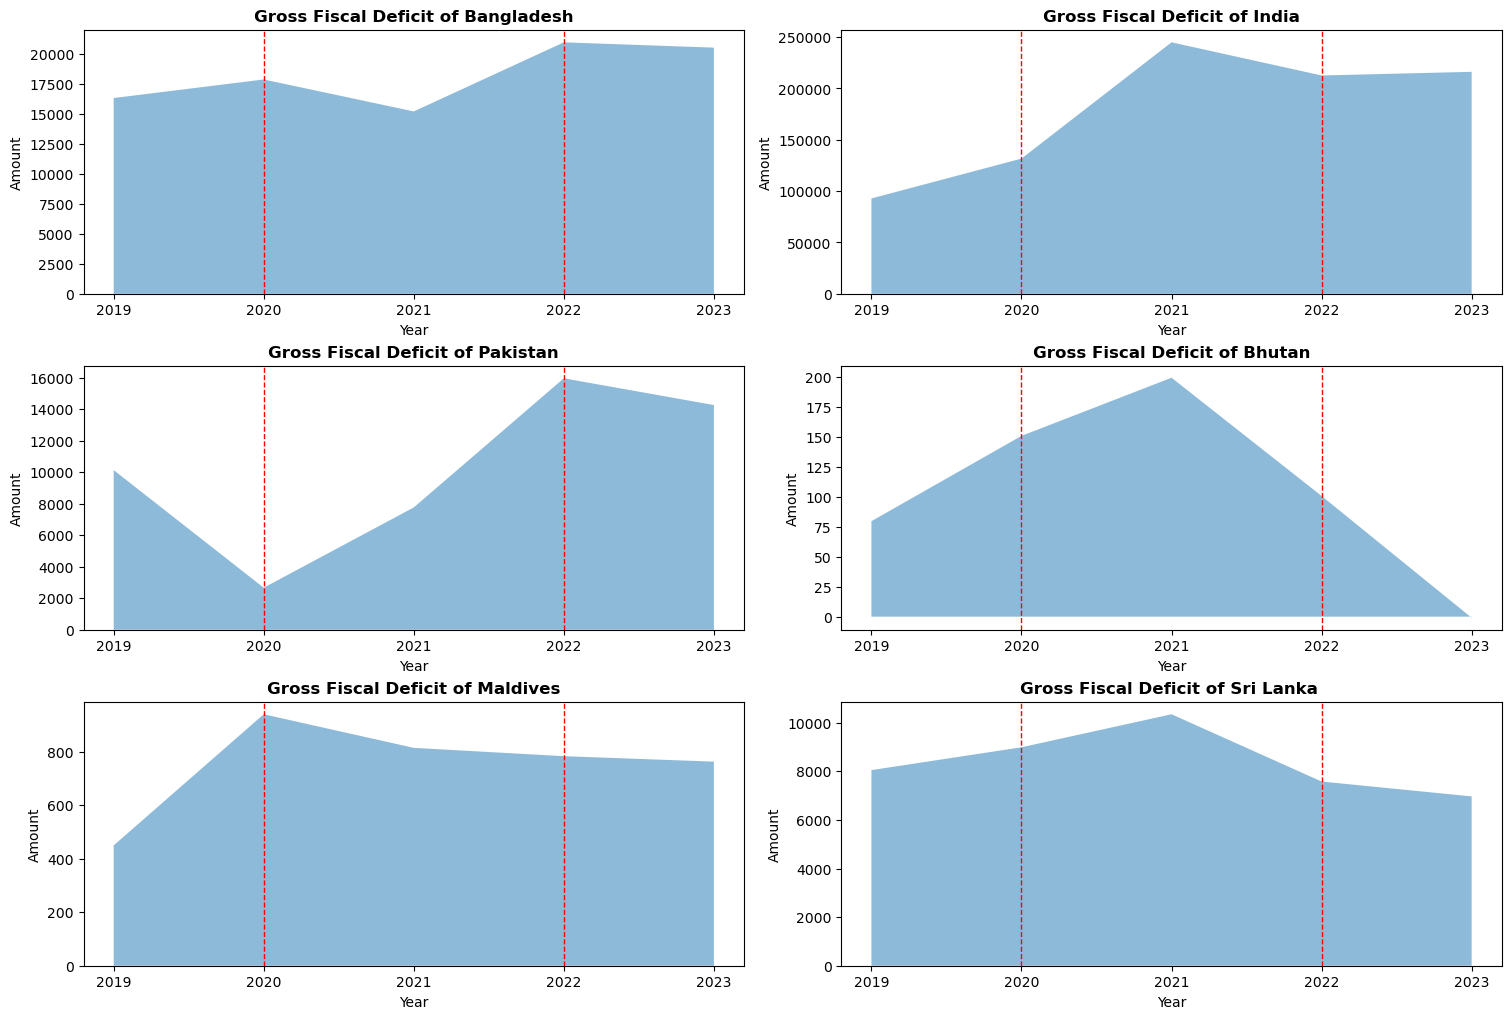

In [362]:
plt.figure(figsize=(15,18), layout='constrained')

for _, countryname in zip(range(1,17), country_names[:-2]):
    temp_df = dfcovid[dfcovid['Country'] == countryname]
    
    plt.subplot(6,2,_)
    plt.stackplot(
        temp_df['Year'],
        temp_df['Gross Fiscal Deficit'],
        alpha=0.5
    )
    plt.axvline(x=2020, color='red', linestyle='--', linewidth=1)
    plt.axvline(x=2022, color='red', linestyle='--', linewidth=1)
    plt.title(f'Gross Fiscal Deficit of {countryname}', fontweight='bold')
    plt.xticks(range(2019,2024,1))
    plt.xlabel('Year')
    plt.ylabel('Amount')

**Obsersation**
- Bangladesh, India, Pakistan, Bhutan, Sri Lanka Gross Fiscal Deficit increased during the period of Covid. However it is noticed that after year 2021, India, Bhutan, Maldives and Sri Lanka managed to lower the fiscal deficit.
- No data for Nepal and Afghanistan. 

## **Y-o-Y growth rate of Fiscal measures of India**

In [365]:
col_to_pct_change = dfindia.select_dtypes(include= 'float').columns

data_rated = dfindia.copy()
data_rated[col_to_pct_change] = (dfindia[col_to_pct_change].pct_change(periods= -1) * 100).round(2)

In [366]:
data_rated  # postive means: amount increased w.r.t to previous year
            # Negative means: amount decreased w.r.t to previous year

,Year,Country,Public Debt (Internal),Public Debt (External),Tax revenue,Total receipts,Total expenditure,Total debt,Debt to revenue,Gross Fiscal Deficit
0,2025,India,6.03,-0.15,7.55,10.60,3.95,5.72,-1.79,-7.15
1,2024,India,9.00,3.25,7.69,10.37,2.89,8.70,1.05,-7.57
2,2023,India,5.59,5.40,7.76,3.09,2.50,5.58,-2.06,1.67
3,2022,India,15.01,6.68,26.06,30.18,7.59,14.53,-9.22,-13.18
4,2021,India,18.02,7.87,0.40,-7.93,24.95,17.38,17.06,86.02
5,2020,India,11.94,13.17,1.60,3.82,14.55,12.02,10.17,41.79
6,2019,India,2.79,-1.78,-2.28,-1.07,-0.42,2.49,4.88,1.28
7,2018,India,16.27,13.54,17.39,12.35,13.03,16.09,-1.07,14.83
8,2017,India,5.82,-2.03,13.91,12.19,7.96,5.26,-7.60,-1.87
9,2016,India,4.56,3.64,-2.46,1.42,0.19,4.49,7.08,-2.57


**Total Expenditure and Total receipts Y-o-Y growth rate**

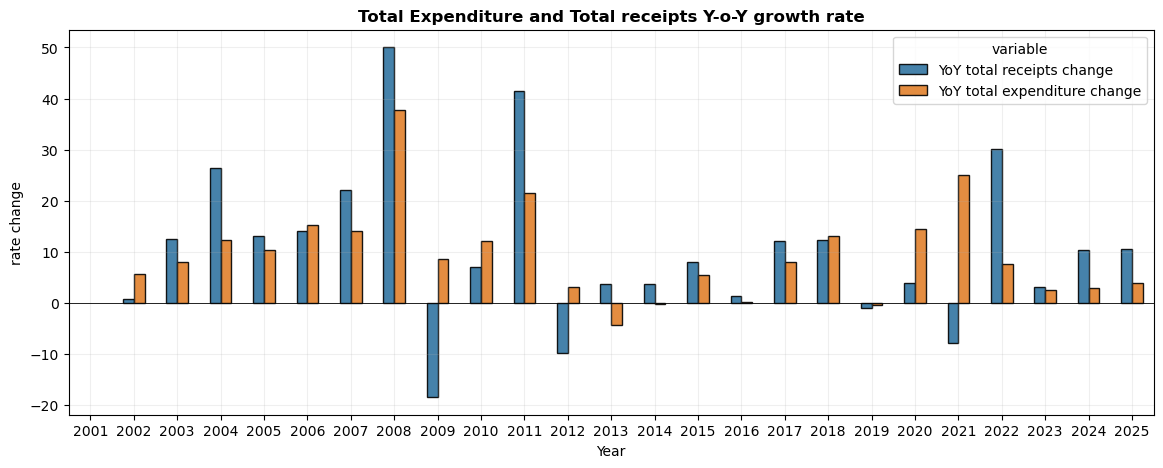

In [368]:
exp_rece_compare = data_rated.loc[:,['Year', 'Total receipts', 'Total expenditure']].melt(
    id_vars=['Year'],
    value_name='rate change'
)  # data_rated melted to perform analysis and visualisation

exp_rece_compare['variable'] = (
    exp_rece_compare['variable'].map({'Total receipts': 'YoY total receipts change',
                                  'Total expenditure': 'YoY total expenditure change'
                                 }))
 
plt.figure(figsize=(14,5))
sns.barplot(
    data= exp_rece_compare,
    x= 'Year',
    y= 'rate change',
    hue= 'variable',
    width= 0.5,
    edgecolor='black',
    alpha=0.9
)
plt.axhline(0,color='black', linewidth=0.6)
plt.title('Total Expenditure and Total receipts Y-o-Y growth rate', fontweight='bold')
plt.grid(alpha=0.2)
plt.show()

**Observation**
- Year on Year receipts are more volatile than goverment spendings.
- During 2008-09 financial crisis, revenue collection fall by 20%. similarly in the Covid pendenic year total receipts decreased by 10%.
- However, post shocks total receipts rebounded like in year 2011 and 2022 surged upto 40% and 30% respectively.

**Year on Year Gross Fiscal Deficit change**

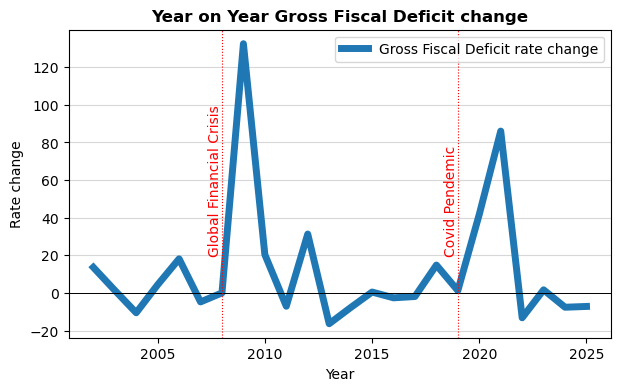

In [371]:
plt.figure(figsize=(7,4))
sns.lineplot(
    data=data_rated,
    x='Year',
    y='Gross Fiscal Deficit',
    label='Gross Fiscal Deficit rate change',
    linewidth=5
)
plt.axhline(0,color='black', linewidth=0.7)
plt.ylabel('Rate change')
plt.grid(axis='y', alpha=0.5)
plt.title('Year on Year Gross Fiscal Deficit change', fontweight='bold')
plt.axvline(2008, color='red', linewidth=0.8, linestyle=':')
plt.axvline(2019, color='red', linewidth=0.8, linestyle=':')
plt.text(
    x= 2008,
    y= plt.ylim()[1] * 0.15,
    s= 'Global Financial Crisis',
    rotation = 90,
    ha='right',
    color='red')
plt.text(
    x= 2019,
    y= plt.ylim()[1] * 0.15,
    s= 'Covid Pendemic',
    rotation = 90,
    ha='right',
    color='red')
plt.show()

**Observation**
- year or year Gross Fiscal Deficit rate change is mostly between +20% and -20% indicating fiscal stability.
- During 2008 Financial crisis deficit jumped as high as 125% and during pendemic deficit increased more the 80% percent than previous year. After the events, fiscal deficit again consodidated through good policies to regain balance.

## **Trend and Regime change analysis of fiscal deficit**

In [374]:
data_rated # percent change wrt. to previous year data

(data_rated.groupby(data_rated['Year'] < 2014)
 ['Gross Fiscal Deficit'].agg(['mean', 'median', 'std'])).rename(index={
    True:'Pre 2014', False:'Post 2014'
 })

,mean,median,std
Year,,,
Post 2014,8.833333,-0.685,28.262441
Pre 2014,15.260833,2.890,39.458841


**Observation**
- Fiscal Deficit rate pre 2014 is quite more volatile than the Fiscal deficit rate after 2014.
- Fiscal deficit rate before 2014 is was almost doubled than fiscal dificit change after 2014.
- Fiscal deficit rate is much better in this regime than fiscal deficit in regime previous 2014.

**Fiscal deficit trend**

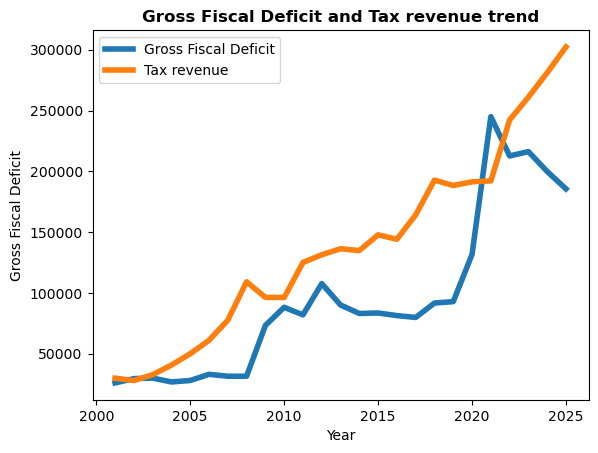

In [377]:
sns.lineplot(
    x=dfindia['Year'],
    y=dfindia['Gross Fiscal Deficit'],
    label='Gross Fiscal Deficit', linewidth=4)
sns.lineplot(
    x=dfindia['Year'],
    y=dfindia['Tax revenue'],
    label='Tax revenue', linewidth=4)
plt.title('Gross Fiscal Deficit and Tax revenue trend', fontweight='bold')
plt.show()

**Most volatile countries**

In [379]:
df_volatile = df[['Year', 'Country', 'Gross Fiscal Deficit']]
df_volatile = df_volatile.copy()

In [380]:
df_volatile['GFD_change'] = (df_volatile.groupby('Country')
                             ['Gross Fiscal Deficit'].pct_change(periods=-1,
                                                                fill_method=None) * 100).round(2)

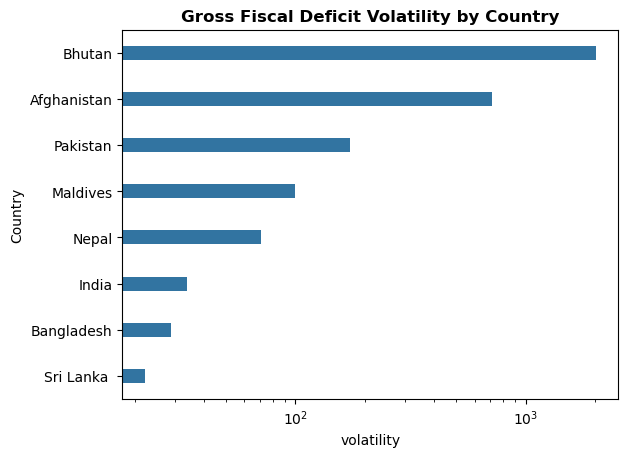

,Country,volatility
0,Bhutan,2013.66
1,Afghanistan,717.04
2,Pakistan,173.32
3,Maldives,99.81
4,Nepal,71.12
5,India,33.73
6,Bangladesh,28.66
7,Sri Lanka,22.14


In [381]:
gfd_sd = (df_volatile.groupby('Country')
                     ['GFD_change'].std().reset_index().rename(columns={
                         'GFD_change':'volatility'
                     })).round(2).sort_values(by='volatility', ascending=False)

sns.barplot(
    y=gfd_sd['Country'],
    x=gfd_sd['volatility'],
    width=0.3
)
plt.xscale('log')
plt.title('Gross Fiscal Deficit Volatility by Country', fontweight='bold')
plt.show()

gfd_sd.reset_index(drop=True)

**Observation**
- Gross fiscal deficit of Bhutan is most volatile whereas Sri Lanka is least volatile.
- India's fiscal deficit change is quite stable which depicts more stable economic policy.

## **Total Expenditure vs Tax revenue Trend**

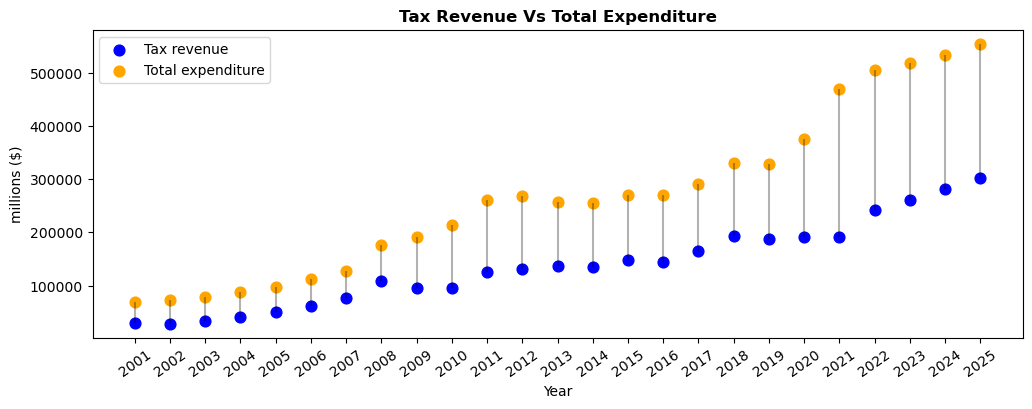

In [384]:
plt.figure(figsize=(12,4))
plt.scatter(
    dfindia['Year'],
    dfindia['Tax revenue'],
    color='blue',
    label='Tax revenue',
    s=60
)
plt.scatter(
    dfindia['Year'],
    dfindia['Total expenditure'],
    color='orange',
    label='Total expenditure',
    s=60
)
plt.legend()
plt.vlines(
    x=dfindia['Year'],
    ymin=dfindia['Tax revenue'],
    ymax=dfindia['Total expenditure'],
    colors='black',
    alpha=0.3)
plt.xticks(range(2001,2026,1), rotation=35, ha='center')
plt.title('Tax Revenue Vs Total Expenditure', fontweight='bold')
plt.ylabel('millions ($)')
plt.xlabel('Year')
plt.show()

**Observation**
- Tax revenue and expenditure gap has widen over the time and experienced significant gap in covid pendemic year 2021.
- After 2021, Tax revenue and Expenditure gap remained stable.

## **Non Tax revenue trend over the years**

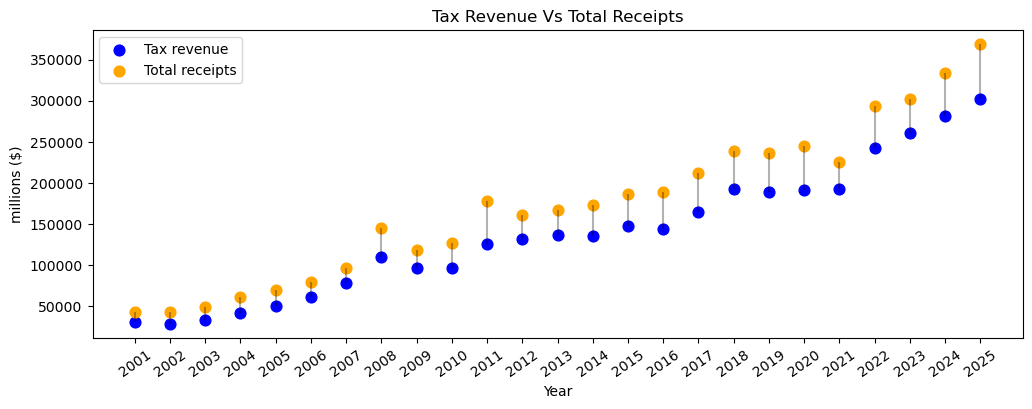

In [387]:
plt.figure(figsize=(12,4))
plt.scatter(
    dfindia['Year'],
    dfindia['Tax revenue'],
    color='blue',
    label='Tax revenue',
    s=60
)
plt.scatter(
    dfindia['Year'],
    dfindia['Total receipts'],
    color='orange',
    label='Total receipts',
    s=60
)
plt.legend()
plt.vlines(
    x=dfindia['Year'],
    ymin=dfindia['Tax revenue'],
    ymax=dfindia['Total receipts'],
    colors='black',
    alpha=0.3)
plt.xticks(range(2001,2026,1), rotation=35, ha='center')
plt.title('Tax Revenue Vs Total Receipts')
plt.ylabel('millions ($)')
plt.xlabel('Year')
plt.show()

**Observation**
- Non-Tax revenue is quite stable over the years. However in 2025, sharp divergence seen in Tax Revenue and Total receipts.

## **Conclusion**
This analysis finds that fiscal deficit volatility differs significantly across countries. India’s fiscal deficit changes have become relatively more stable in recent years, indicating a degree of fiscal consolidation compared to earlier periods.

The analysis also shows that fiscal deficits increased sharply during periods of economic stress, particularly during the global financial crisis and the COVID-19 pandemic, reflecting higher public spending and revenue shortfalls during these shocks.

In the post-pandemic period, India’s fiscal deficit growth appears more stable, suggesting a gradual return toward fiscal normalisation. While the data does not establish causality, the observed stabilisation is consistent with efforts to improve revenue mobilisation and manage expenditure growth.

Overall, the results indicate that fiscal deficit volatility in the recent period is lower than in earlier years, and that fiscal dynamics have moved toward a more stable trajectory following the pandemic-induced shock.

In [390]:
# End